# House predictions with linear regression

In [1]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
data = tc.SFrame('Hyderabad.csv')
data

Finished parsing file /home/qyu2/SupervisedML/Assignment1/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.029014 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/qyu2/SupervisedML/Assignment1/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.033443 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


<b>2a)</b> There are 2518 rows and 40 columns are in the data file. 

### Exploring the relationship between price and area

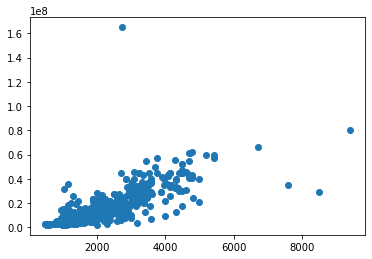

In [3]:
plt.scatter(data['Area'], data['Price'])

In [4]:
# codes that used to locate the outliers
highest_price = data['Price'].max()
#highest_price
#data[data['Price']==highest_price]

In [5]:
# codes that used to locate the outliers
biggest_area = data['Area'].max()
#biggest_area
#data[data['Area']==biggest_area]

<b>2b)</b> Yes, there are potential outliers shown in the price vs. area scatter plot.     
   <ul>
    <li style="list-style-type: none;"> <b>Potential outliers:</b></li>
    <li> (2,750, 1.65) </li>
    <li> (9,400, 0.80) </li>
   </ul>

In [6]:
simple_model = tc.linear_regression.create(data, features=['Area'], target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.010107     | 144490481.820965   | 10750118.516396      | 4978690.932043                  | 3163436.618275                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [7]:
simple_model.coefficients

name,index,value,stderr
(intercept),None,-6140480.734729499,245419.81056512185
Area,None,9690.908695914526,135.5407949578173


In [8]:
b, m = simple_model.coefficients['value']
print("slope:", m)
print("y-intercept:", b)

slope: 9690.908695914526
y-intercept: -6140480.734729499


<b>2c)</b> The equation of the best fit line produced by <i>simple_model</i> that uses only price and area is y = 9,690.91x - 6,140,480.73. 

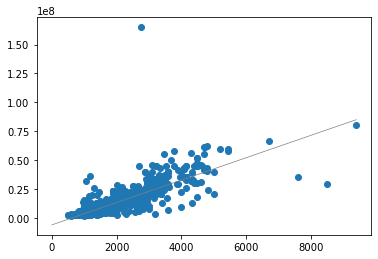

In [9]:
plt.scatter(data['Area'], data['Price'])
utils.draw_line(m, b, starting=0, ending=max(data['Area']))

### Building a model that uses all the features

In [10]:
model = tc.linear_regression.create(data, target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 39

Number of unpacked features : 39

Number of coefficients    : 279

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.100293     | 140156583.597708   | 18776984.047623      | 4245825.931984                  | 4122321.255597                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [11]:
model.coefficients

name,index,value,stderr
(intercept),None,-2954537.6306216214,611176.5346372671
Area,None,8934.365898230713,261.6481800826038
Location,Hitech City,4886772.058562356,772854.5776865365
Location,Manikonda,-50205.78309508253,664750.1922595348
Location,Alwal,-694490.8808593132,1185490.46346339
Location,Kukatpally,1726129.1308735749,649264.8006058176
Location,Gachibowli,4934333.52896848,755880.6420550938
Location,Tellapur,-844823.1014257107,1079649.4642232978
Location,Kokapet,635585.2684101377,794779.2814489607
Location,Hyder Nagar,1721314.9155790957,2307905.6428229115


<b>2d)</b> -2954537.6306216214 and 8934.365898230713 are the coefficient values that are associated with the intercept and area in the trained model that uses all features. They are not the same as the intercept and slope found by simple_model because the simple model only using the area feature to predict the price. 

In [12]:
model.evaluate(data)

{'max_error': 140156583.59770793, 'rmse': 4239731.304516625}

In [13]:
house = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
house

Area,No. of Bedrooms
1000,3


In [14]:
model.predict(house)

dtype: float
Rows: 1
[2207739.9518606598]

<b>2e)</b> The predicted price of a house with three bedrooms and an area of 1000 square feet is $2,207,739.95. 

<b>2f)</b> The maximum error of the model is 140,156,583.60 and the root-mean-squared error is 4,239,731.30. The maximum error and RMSE error are large in this model. The maximum error is the worst case error between the predicted value and the true value. A large RMSE may mean that the dataset has many outliers. The price of a house may depend on many other features that are not in this dataset. 

rmse is about overall fit, where maximum error is about one point